# Assignment 3 - Ridge and Lasso Regression 

### We are going to predict baseball salaries from performance data.  

In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


The task in this assignment is to build models of Baseball players (only fielding players, not pitchers) salaries based on statistics.  These are real data from MLB.  
Why is this an important task - if you are a player learn what gets you paid! 
I did a little bit of clean up of the csv as we read it in. 

In [2]:
df = pd.read_csv('Hitters.csv', index_col=0)
df.index.name = 'Player'
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, -Andy Allanson to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    obje

The first 7 variables are from the previous season.  The variables starting with a C are career statistics.  PutOuts, Assists, and Errors are also single season statistics.  Salary is their salary.  League, Division, and NewLeague reflect where they play. 

Always deal with problems.  Non-null count tells you how many entries you have that are not missing values.  `Salary` clearly shows missing values. 

In [3]:
#Lets preemptively get rid of garbage. 
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, -Alan Ashby to -Willie Wilson
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Player,,,,,,,,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


1.  Encode and organize the data

There are 4 variables that are objects, i.e., string -  League, Division, and NewLeague.   You need to convert these into numeric variables, for example by using `get_dummies`.  

Take a moment to look at the values contained in each of these, and then make a strategy of how you want to encode them.  Keep in mind that each of them takes only two values, and you dont want to create variables that are redundant.  

NewLeague indicates the team the league is in for the new season.  Very few players change leagues, so there is not much information there.  You should remove it from the dataframe, and I assumed you did in the rest of this assignment.

The response variable is Salary.  The other variables are your predictors.  

In [5]:
df = pd.read_csv("hitters.csv")

df = df.drop(columns=["NewLeague"])
df = df.dropna(subset=["Salary"])

df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce")
df = pd.get_dummies(df, columns=["League", "Division"], drop_first=True)

y = df["Salary"]
X = df.drop(columns=["Salary"])

print(X.head())
print(y.head())
print(X.shape, y.shape)

                Name  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  \
1        -Alan Ashby    315    81      7    24   38     39     14    3449   
2       -Alvin Davis    479   130     18    66   72     76      3    1624   
3      -Andre Dawson    496   141     20    65   78     37     11    5628   
4  -Andres Galarraga    321    87     10    39   42     30      2     396   
5   -Alfredo Griffin    594   169      4    74   51     35     11    4408   

   CHits  CHmRun  CRuns  CRBI  CWalks  PutOuts  Assists  Errors  League_N  \
1    835      69    321   414     375      632       43      10      True   
2    457      63    224   266     263      880       82      14     False   
3   1575     225    828   838     354      200       11       3      True   
4    101      12     48    46      33      805       40       4      True   
5   1133      19    501   336     194      282      421      25     False   

   Division_W  
1        True  
2        True  
3       False  
4       Fa

2.  Its useful to do some exploratory data analysis.  
    First, visualize just the single season statistics. The first 7 columns in the dataframe from contain the single season statistics.  A pairplot would be a useful idea. You should immediately see that some of these variables are highly correlated. 

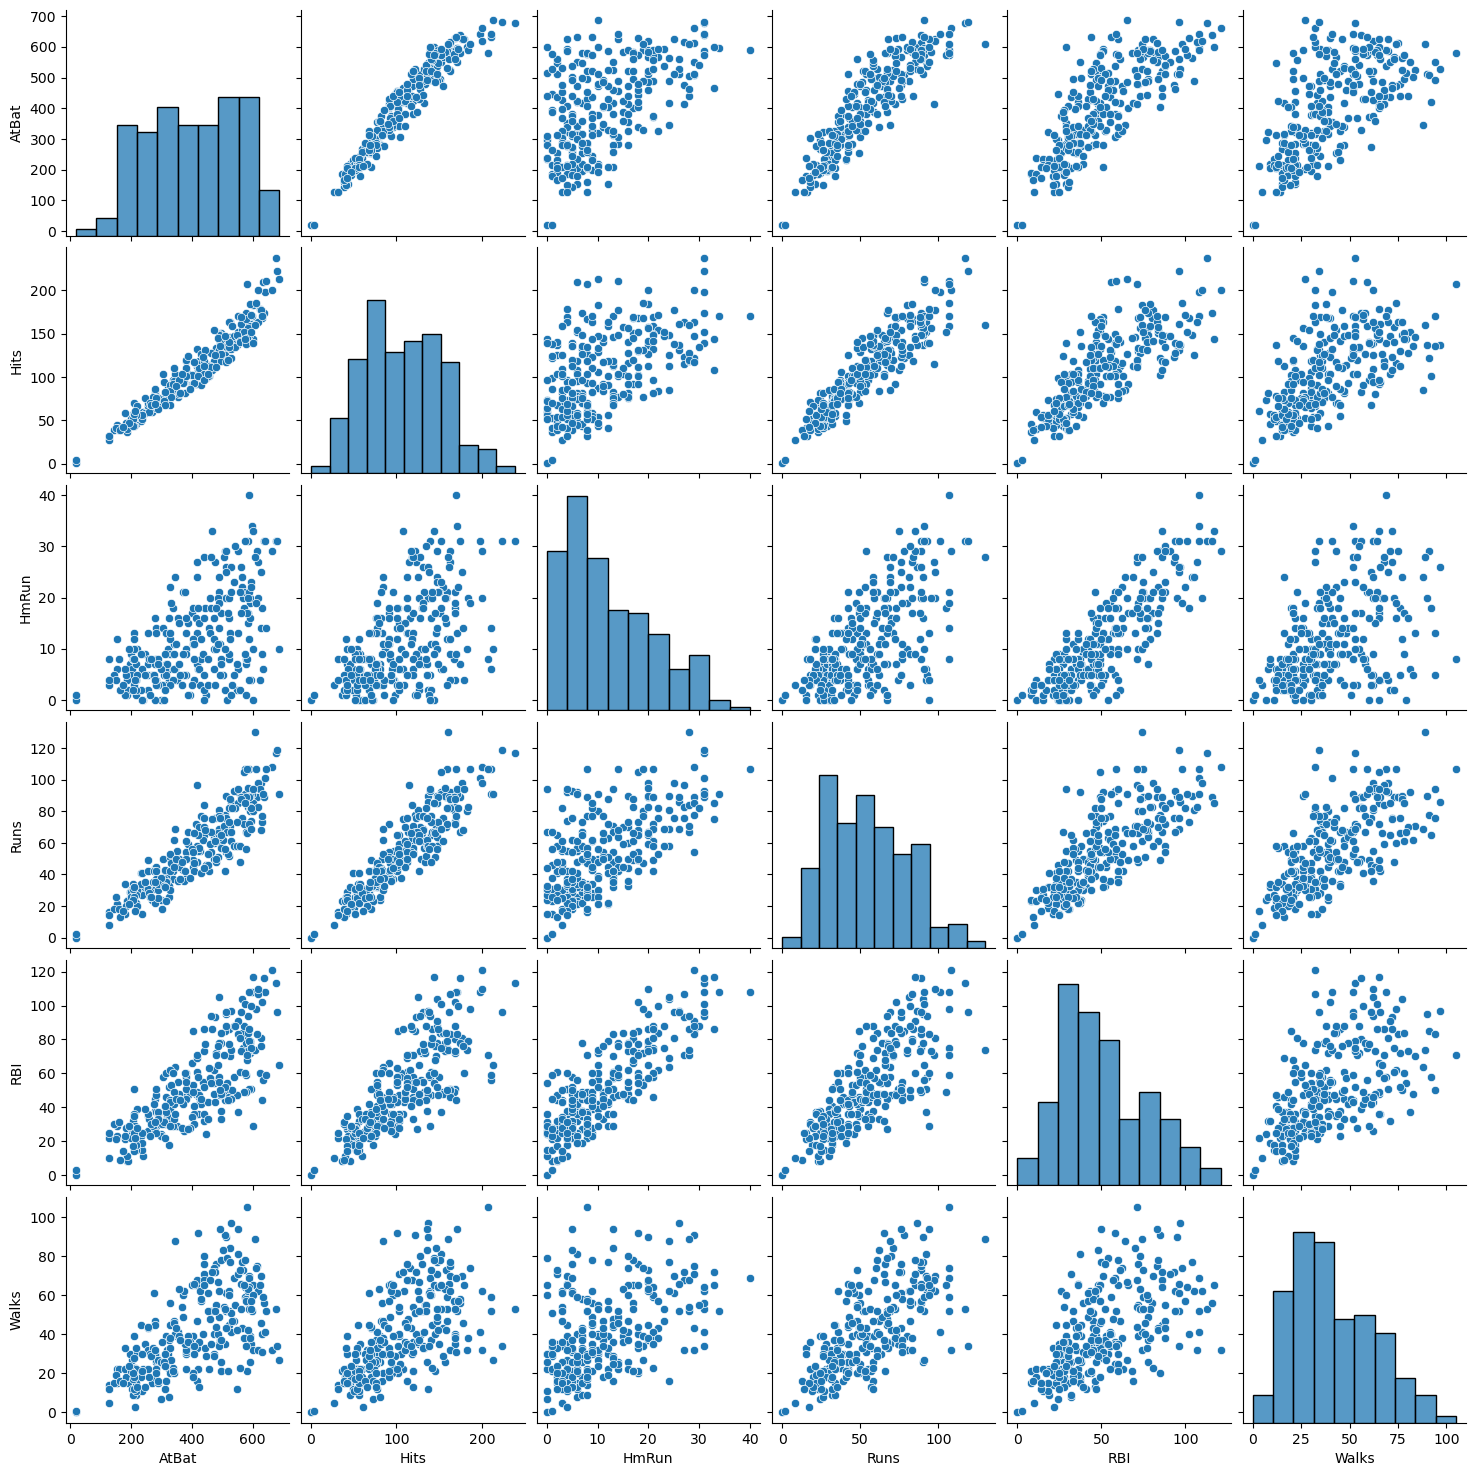

In [6]:
df = pd.read_csv("hitters.csv")
df = df.drop(columns=["NewLeague"])
df = df.dropna(subset=["Salary"])

df = pd.get_dummies(df, columns=["League", "Division"], drop_first=True)

single_season_stats = df.iloc[:, :7]

sns.pairplot(single_season_stats, diag_kind="hist")
plt.show()

Make a heatmap showing the correlations between all the variables.  This will not work unless you have converted it all into dummy variables 

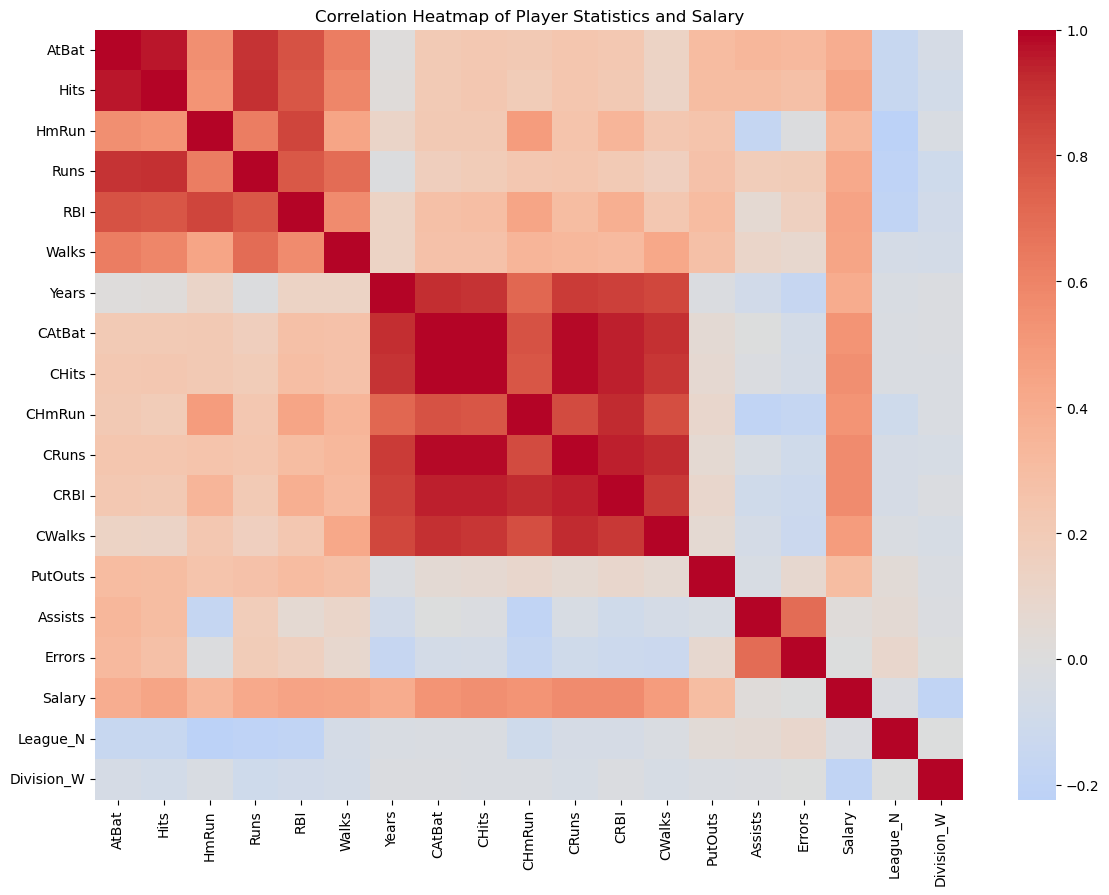

In [8]:
df = df.drop(columns=['Name'])

corr_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Player Statistics and Salary")
plt.show()

Write down your impression of the data in the box below   What variables are highly correlated?  Are the single season statistics and career statistics highly correlated? What are some candidate variables that could explain salary? 

Looking at the charts for single season predictors, Hits + AtBat, Runs + Hits, Runs + AtBat seem to have the highest correlation, as all the points are clustered very close together almost like a regression line. The single season and career statistics have a moderate correlation, ranging from 0.4 to 0.6. Variables like years in the MLB (more experienced players get paid more), errors (players who make more mistakes don't get paid as much), career home runs (getting more points for the team = gives the team more recognition and success). 

3.  Separate the data into test (25%) and training sets.  Also separate the response variable (salary) into a separate variable y, and the predictors into a separate variable X.  Use StandardScaler to scale the predictors.   Whether you choose the scale the response variable is somewhat arbitrary.  If you dont, you will get a model that predicts actual salaries and has an intercept.  For this exercise lets do it that way. 

- Split the data into training and test sets 

In [11]:

y = df['Salary']
X = df.drop(columns=['Salary'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

- Build a standard scaler model from the training set and apply to training and test sets.  

In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

4.  Fit a model using OLS (`LinearRegression`).  Quantify how it fits the data in the test set by computing $r^2$.  Make a scatter plot showing the predicted salaries against the actual salaries in the test set. Make a bar plot showing the regression coefficients (`.coef_`) on each predictor. In the empty markdown box, write down how you would describe the model. 

## Multiple Linear Regression 

Test Set R^2: 0.4128384762993932


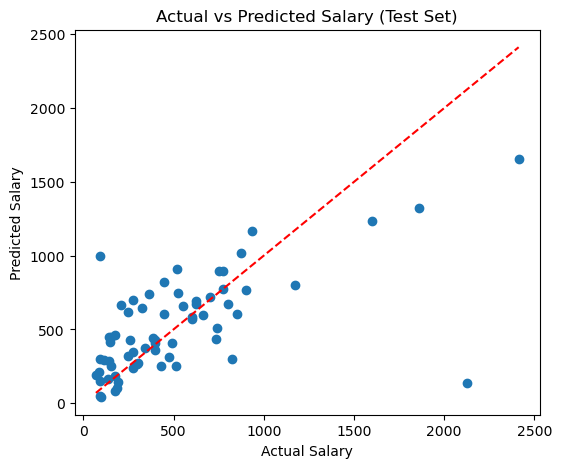

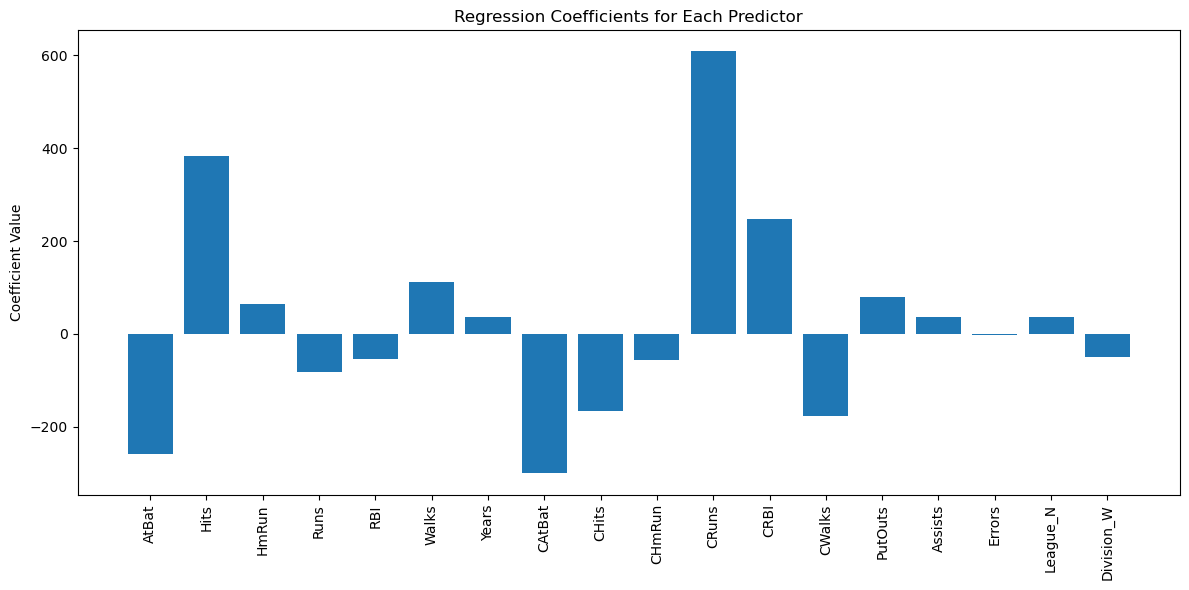

In [14]:
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print("Test Set R^2:", r2)

plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # reference line
plt.show()

coef_values = lr.coef_
feature_names = X.columns

plt.figure(figsize=(12,6))
plt.bar(range(len(coef_values)), coef_values)
plt.xticks(range(len(coef_values)), feature_names, rotation=90)
plt.ylabel("Coefficient Value")
plt.title("Regression Coefficients for Each Predictor")
plt.tight_layout()
plt.show()

Discuss your results here.  What do you think are the most important predictors.  What does it mean if the $\beta$ is positive versus negative.  

According to these visualizations, AtBat, Hits, CRuns, CAtBat are the most important predictors. If the $\beta$ is positive, a positive correlational relationship between the variable and salary can be inferred. So, for predictors with positive coefficients, the predicted salary increases correspondingly. If the $\beta$ is negative, a negative correlational relationship exists between the variables. 

5.  Fit a model using Ridge Regression with cross validation.
* The `RidgeCV()` function has an $\alpha$ argument that is $\lambda$ from the lecture notes used to tune the model.
* `RidgeCV()` requires a range of value of $\alpha$ to be specified. The selected $\alpha$ will make use of cross-validation.  
* $\alpha$  = 0 is equivalent to the Least Squares solution, but it is not recommended to you actually set $\alpha$ = 0 so avoid that.  
* We expect the coefficient estimates to be much smaller, in terms of $L_2$ norm, when a large value of $\alpha$ is used,
* A very large $\alpha$ has tiny coefficients and and the model is dominated by the intercept. 
* By default `RidgeCV()` performs generalized cross-validation(essentially Leave one-out CV),
* This can be changed using the argument `cv`.

        alphas = 10**np.linspace(5,-5,20)
        ridgecv = RidgeCV(alphas = alphas,cv = 5) # 5-fold cross validation
* the best value of alpha (over the range tested) is in `ridgecv.alpha_`
* Evaluate the model by predicting the test data  


In [15]:
alphas = 10**np.linspace(5, -5, 20)
ridgecv = RidgeCV(alphas = alphas, cv = 5)
ridgecv.fit(X_train_scaled, y_train)
print("Best alpha selected:", ridgecv.alpha_)

y_pred_ridge = ridgecv.predict(X_test_scaled)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("Test Set R^2 for Ridge Regression:", ridge_r2)

Best alpha selected: 233.57214690901236
Test Set R^2 for Ridge Regression: 0.3063742213629127


Make a scatter plot of the predicted salaries versus the actual salaries. Make a bar graph of the weights on the coefficients. 


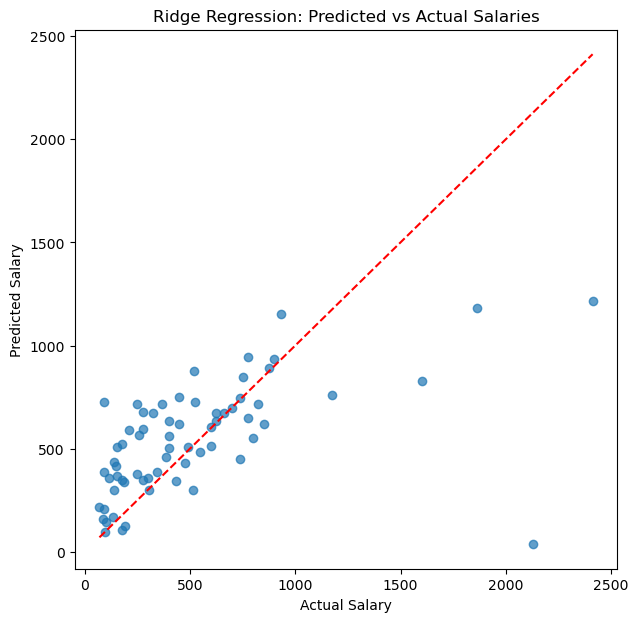

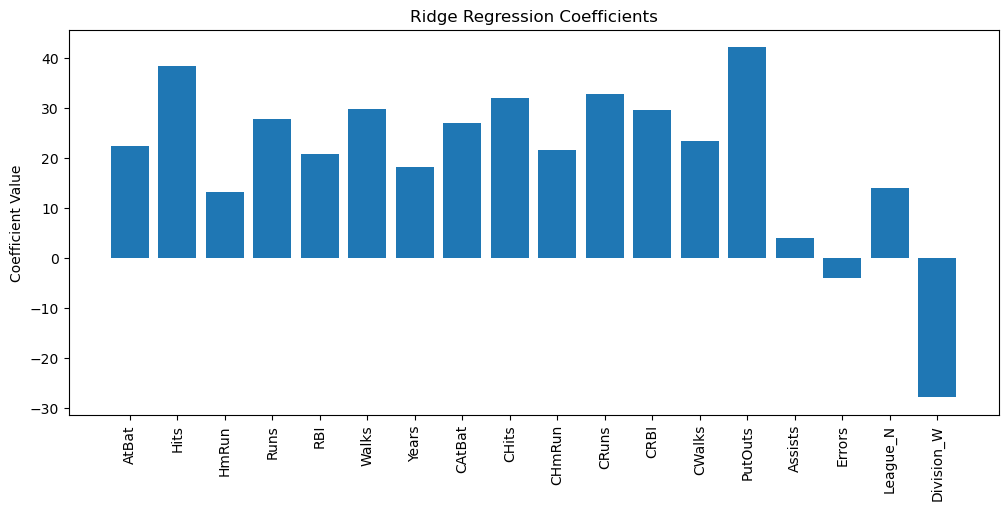

In [16]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_ridge, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Ridge Regression: Predicted vs Actual Salaries")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(X.columns, ridgecv.coef_)
plt.xticks(rotation=90)
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Coefficients")
plt.show()

5.  Fit a model using LASSO Regression with cross validation. Use `LassoCV` with the same range of alpha values.  (This is not strictly required.  Typically you should test more small values of alpha)

In [21]:
alphas = 10**np.linspace(5, -5, 100)

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Best alpha selected for LASSO:", lasso_cv.alpha_)

y_pred_lasso = lasso_cv.predict(X_test_scaled)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("LASSO R^2 on test set:", r2_lasso)



Best alpha selected for LASSO: 4.534878508128582
LASSO R^2 on test set: 0.3443152673872921


Make a scatter plot of the predicted and actual values of salary.  Make a bar graph of the Lasso coefficients (some of them are zero)

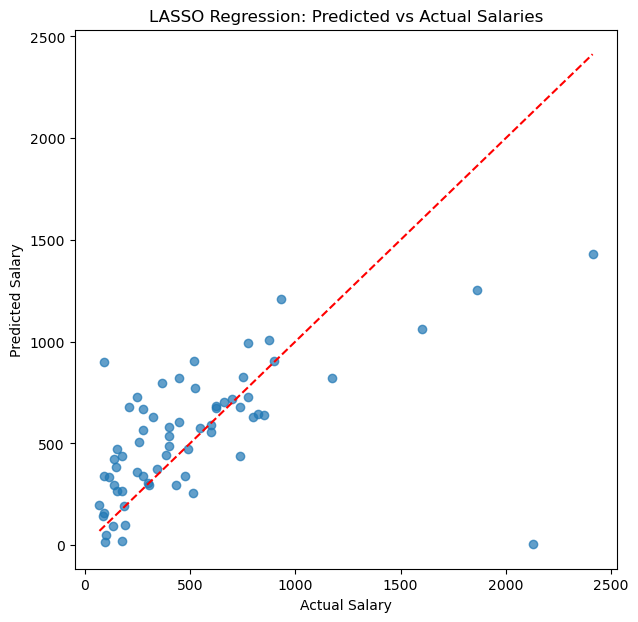

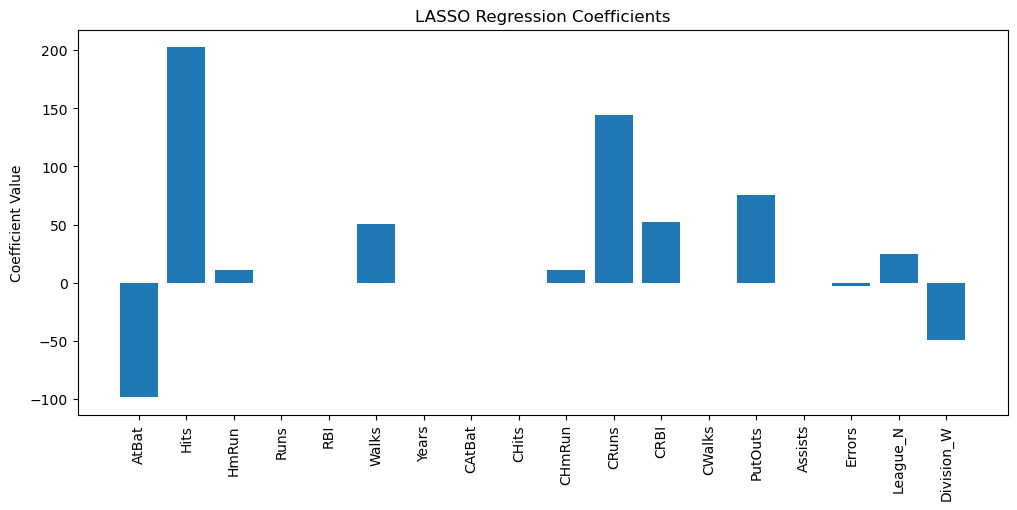

In [22]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("LASSO Regression: Predicted vs Actual Salaries")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

plt.figure(figsize=(12, 5))
plt.bar(X.columns, lasso_cv.coef_)
plt.xticks(rotation=90)
plt.ylabel("Coefficient Value")
plt.title("LASSO Regression Coefficients")
plt.show()

6. I would like you to summarizethe results of this analysis, focusing on comparing Ridge and Lasso. 
    - How did they perform in prediction? is there a big difference?
    - What are the similarities in the pattern of coefficients selected? 
    - What are the differences? 
    - Does the correlation between the predictors have an effect on the two models?
    - Are there any surprising results in either model? 
    - Which model is easier to talk about?  
    - Is East Coast bias real? 

Both Ridge and Lasso had extremely similar predictive lines for the MLB player's salary, with Ridge appearing just slightly steeper. The pattern of coefficients selected both harbor negative coefficients for the Division_W variable, but differ in practically every other variable otherwise. The coefficients using Ridge regression are all positive and fall under 100, whereas the coefficients for Lasso Regression have greater variance. There are two negative coefficients, 9 positive coefficients, and the rest are not pictured on the graph, which leads me to assume their coefficients are valued at zero due to irrelevance.

The correlation heatmap displays CRuns (Amount of homeruns hit in a player's entire career) as a strong predictor of an MLB player's salary, and we can see this reflected not just in Ridge and Lasso's coefficient analysis, but the test analysis as well. The CRuns coefficient is consistently positive and either one of the numerically highest or the highest (depending on the type of analysis, Ridge or Lasso) variable. 

I'm surprised that both the Ridge and Lasso Models predicted the salaries so close to what they actually were. In my opinion, Lasso is easier to talk about, because it emphasizes the most significant contributors to the Salaries of the MLB players and blocks out/reduces the less relevant variables. This can be incredibly helpful in a dataset of this type, which has so many variables/predictors to sort from. 